### In this notebook, a Convolutional Neural Network is trained on Plant Seedling dataset from Kaggle 

#### https://www.kaggle.com/c/plant-seedlings-classification

In [1]:
# Import libraries
import numpy as np 
import pandas as pd 

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train', 'sample_submission.csv']


In [2]:
!rm -rf input

In [3]:
!cp -r ../input .

In [4]:
# Fastai library is a wrapper on top of pytorch and it has a range of functions which are useful for implementing 
# Deep Learning models.
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [5]:
path = Path('input/train/')

In [6]:
np.random.seed(42)
# Training data is loaded from the folder in batches of 32 images and it is normalized. 
data = ImageDataBunch.from_folder(path,test='../test', ds_tfms=get_transforms(),valid_pct=0.25,size=299,bs=32,num_workers=0)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3563 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Black-grass,Black-grass,Black-grass,Black-grass,Black-grass
Path: input/train;

Valid: LabelList (1187 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Loose Silky-bent,Scentless Mayweed,Charlock,Fat Hen,Common Chickweed
Path: input/train;

Test: LabelList (794 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: EmptyLabelList
,,,,
Path: input/train

In [7]:
# There are 12 data classes
print(data.classes)
len(data.classes),data.c

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


(12, 12)

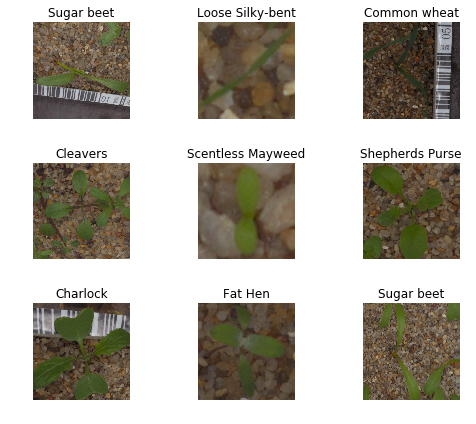

In [8]:
data.show_batch(rows=3,figsize=(7,6))

### Resnet 50 is the CNN model used for transfer learning. It contains residual blocks that allow us to build large 50 layer CNN by adding an identity function that simplifies the optimization process while training the Neural Network.

<img src="images/4.png">

<img src="images/3.jpeg">

<img src="images/2.png">

In [9]:
learn = create_cnn(data,models.resnet50,metrics=error_rate)

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 40.4MB/s]


In [10]:
# We find the best learning rate which is plotted in the next graph
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


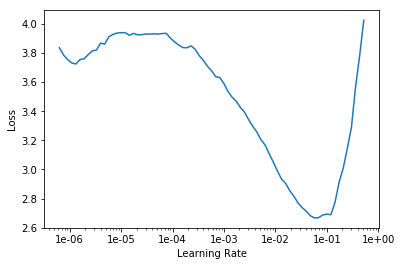

In [11]:
# The plot shoes that 1e-02 and 1e-01 are best learning rates
learn.recorder.plot()

In [13]:
# CNN is trained for 6 iterations
learn.fit_one_cycle(6,slice(1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.086490,5.349880,0.109520,02:30
1,1.087657,10.077064,0.095198,02:28
2,0.727782,4.308343,0.082561,02:27
3,0.476565,14.566295,0.081719,02:28
4,0.399972,6.387133,0.074979,02:28
5,0.363162,2.218358,0.075821,02:28


In [14]:
# The model is saved
learn.save('resnet50_1')

In [15]:
# Model is loaded
learn.load('resnet50_1')

Learner(data=ImageDataBunch;

Train: LabelList (3563 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Black-grass,Black-grass,Black-grass,Black-grass,Black-grass
Path: input/train;

Valid: LabelList (1187 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Loose Silky-bent,Scentless Mayweed,Charlock,Fat Hen,Common Chickweed
Path: input/train;

Test: LabelList (794 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: EmptyLabelList
,,,,
Path: input/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilat

In [16]:
# Test data is loaded from the folder in batches of 32 images and it is normalized.
data = ImageDataBunch.from_folder(path,test='../test', ds_tfms=get_transforms(),valid_pct=0.25,size=350,bs=32,num_workers=0)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3563 items)
x: ImageList
Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350)
y: CategoryList
Black-grass,Black-grass,Black-grass,Black-grass,Black-grass
Path: input/train;

Valid: LabelList (1187 items)
x: ImageList
Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350)
y: CategoryList
Scentless Mayweed,Fat Hen,Common wheat,Cleavers,Sugar beet
Path: input/train;

Test: LabelList (794 items)
x: ImageList
Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350)
y: EmptyLabelList
,,,,
Path: input/train

In [17]:
# The predicts in test dataset are plotted and the precision recall is found out.
interp = ClassificationInterpretation.from_learner(learn)
from sklearn import metrics
print(metrics.classification_report(interp.y_true.numpy(), interp.pred_class.numpy(),target_names =data.classes))

                           precision    recall  f1-score   support

              Black-grass       0.76      0.41      0.53        75
                 Charlock       1.00      0.98      0.99       105
                 Cleavers       0.94      0.96      0.95        68
         Common Chickweed       0.99      1.00      0.99       140
             Common wheat       0.94      0.83      0.88        58
                  Fat Hen       0.94      0.97      0.95       123
         Loose Silky-bent       0.79      0.95      0.86       170
                    Maize       0.96      1.00      0.98        51
        Scentless Mayweed       0.94      0.96      0.95       123
          Shepherds Purse       0.95      0.93      0.94        56
Small-flowered Cranesbill       0.98      0.96      0.97       130
               Sugar beet       0.95      0.95      0.95        88

                 accuracy                           0.92      1187
                macro avg       0.93      0.91      0.91    

In [18]:
preds,y=learn.get_preds(ds_type=DatasetType.Test)

In [19]:
preds = np.argmax(preds, axis = 1)
preds_classes = [data.classes[i] for i in preds]

In [22]:
preds[:5]

tensor([ 3,  4, 10,  8, 10])

In [23]:
preds_classes[:5]

['Common Chickweed',
 'Common wheat',
 'Small-flowered Cranesbill',
 'Scentless Mayweed',
 'Small-flowered Cranesbill']